In [55]:
import pandas as pd
import numpy as num
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
Titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [57]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
print(Titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [60]:
Titanic.drop(columns=['Cabin'], inplace=True)

In [61]:
Titanic['Embarked'] = Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0])

In [62]:
Titanic['Age'] = Titanic['Age'].fillna(Titanic['Age'].median())

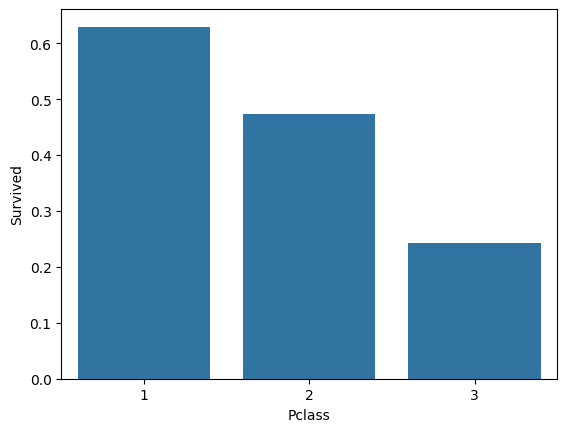

In [63]:
sns.barplot(x='Pclass', y='Survived', data=Titanic,errorbar=None)
plt.title=('survive rate by class')
plt.show()

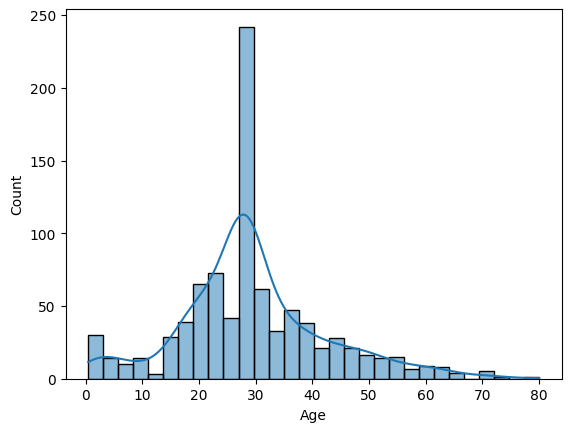

In [13]:
sns.histplot(Titanic['Age'], bins=30,kde=True)
plt.title=('age distrubtion')
plt.show()

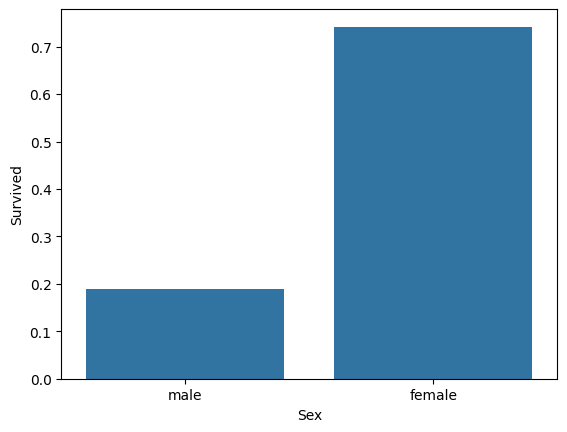

In [14]:
sns.barplot(x='Sex',y='Survived', data=Titanic,errorbar=None )
plt.title=('sex and Survived graph')
plt.show()

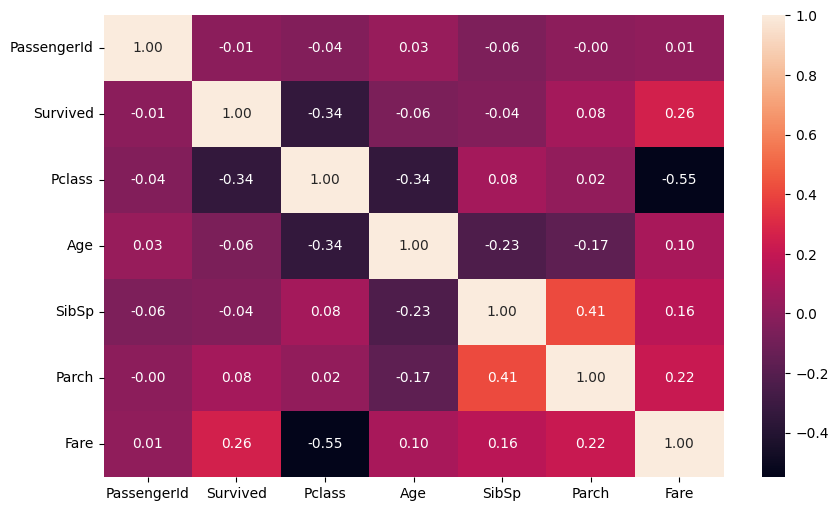

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(Titanic.corr(numeric_only=True),annot=True, fmt='.2f')
plt.title=('Titanic Correlation Heatmap')
plt.show()

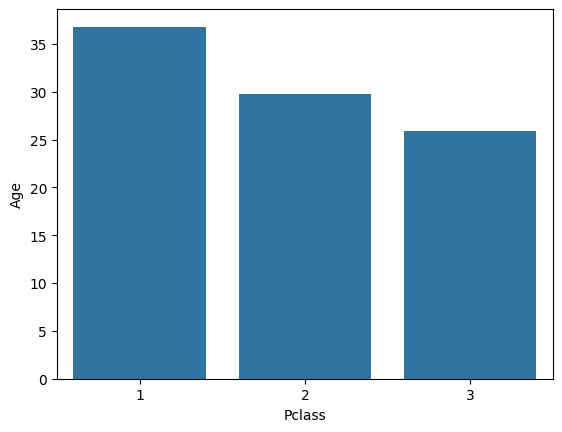

In [25]:
sns.barplot(x='Pclass', y='Age',data=Titanic,errorbar=None)
plt.title=('distrubtion in age and Pclass')
plt.show()

TypeError: 'str' object is not callable

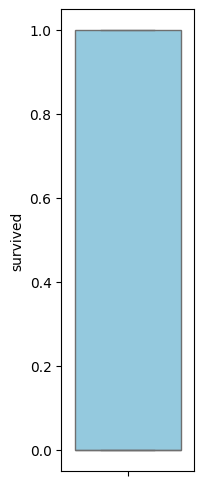

In [49]:
numeric_cols = Titanic.select_dtypes(include=[num.number]).columns.tolist()
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=Titanic[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()
def remove_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for col in columns:
        if cleaned_data[col].isnull().all():
            continue
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[
            (cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)
        ]
    return cleaned_data
df_clean = remove_outliers_iqr(Titanic, numeric_cols)
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_clean[col], color='lightgreen')
    plt.title(col + " (Cleaned)")
plt.tight_layout()
plt.show()
print(f"Original dataset shape: {Titanic.shape}")
print(f"After removing outliers: {df_clean.shape}")